In [ ]:
#### import pandas as pd
import numpy as np
from sklearn import decomposition 
from sklearn import preprocessing 
from P6_02_functions import *
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import scipy.stats  as st
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Chargement des données

In [2]:
notes = pd.DataFrame(pd.read_csv('notes.csv',sep=';'))

# Objectif:
- **Mission 0**:
    * Description des données
    * Analyse uni et bivariées
- **Mission 1**:
    * Analyse de l'éboulis des valeurs propres ;
    * Représentation des variables par le cercle des corrélations ;
    * Représentation des individus par les plans factoriels ;
    * Analyser la qualité de représentation et la contribution des individus.
- **Mission 2**:
    * Appliquez un algorithme de classification, puis analysez le résultat obtenu.
    * Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.
- **Mission 3**:
     * Modélisez les données à l'aide d'une régression logistique. 
     * Grâce à celle-ci, vous créerez un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. 
     * Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. 
     * Dans le cas contraire, il sera considéré comme faux.

# Mission 0
### Analyse de forme:
- **Variable target** : is_genuine
- **Lignes et colonnes** : 170 / 7
- **Type de variables** : quantitavies: 6,qualitative: 1
- **Analyse des valeurs manquantes**: 0 valeur manquante
- **Lignes dupliquées**: 0

### Analyse de fond:
- **Visualisation de la target** :
    - 58,8% de billets authentiques
    - 41,2% de de faux billets
    
- **Signification des variables** :
    - Variables continues non standardisées, 50% assez symétriques et 50% asymétriques
    - Variable qualitative: binaire (True, False), l'authenticité ou non d'un billet
    
- **Relation Target / Variables** :
    - target / diagonal: les vrais billets et les faux billets ont relativement les mêmes diagonales; la digonale ne permettrait pas forcément de déterminer l'authenticité d'un billet
    - target / autres variables: l'authenticité d'un billet serait éventuellement liée aux variables height_right, height_left, margin_up, margin_low, length

## Analyse plus détaillée
- **Relation Variables / Variables** :
    - height_right / height_left: fortement corrélés
    - Absence totale de corrélations entre certaines variables
    - Faible corrélation entre les certaines variables
   
### Hypothèse nulle (H0):
    - La diagonale ne varie pas en fonction de l'authenticité d'un billet

## Analyse de Forme de notre dataset:

In [3]:
df = notes.copy()
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [4]:
#Checker les valeurs null
df.isnull().sum().sum()

0

In [5]:
df.dtypes.value_counts()

float64    6
bool       1
dtype: int64

In [6]:
df.drop_duplicates().shape

(170, 7)

In [7]:
df.drop_duplicates().shape

(170, 7)

In [8]:
df.drop('is_genuine', axis =1).drop_duplicates().shape

(170, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


## Analyse de Fond des données

### Examen de la colonne target

In [10]:
df['is_genuine'].value_counts(normalize=True)

True     0.588235
False    0.411765
Name: is_genuine, dtype: float64

### Histogrammes des variables 

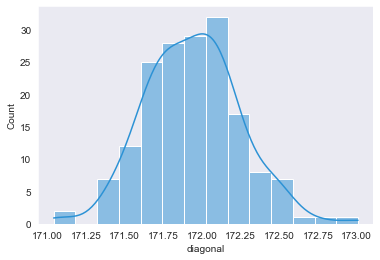

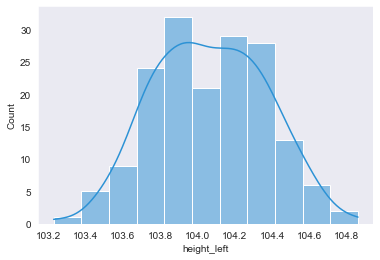

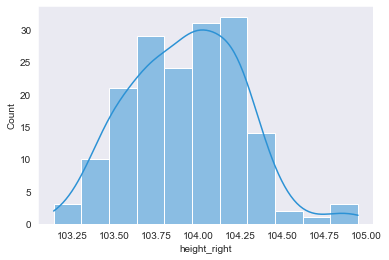

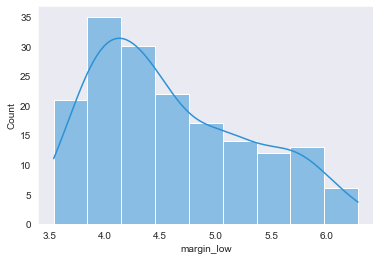

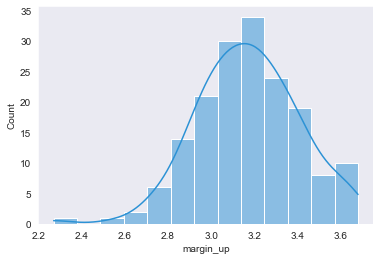

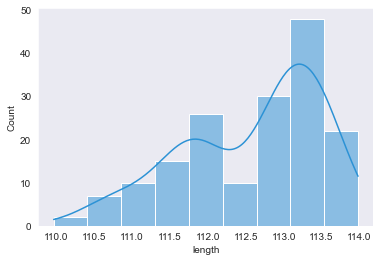

In [11]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df[col], kde=True, color='#2C92D5')
    

### Analyse de la target

In [12]:
for col in df.select_dtypes('bool'):
    print(f'{col :-<120} {df[col].unique()}')

is_genuine-------------------------------------------------------------------------------------------------------------- [ True False]


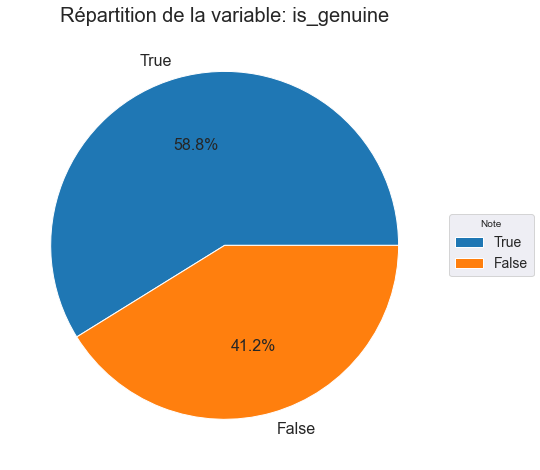

In [13]:
pie(df, "is_genuine")

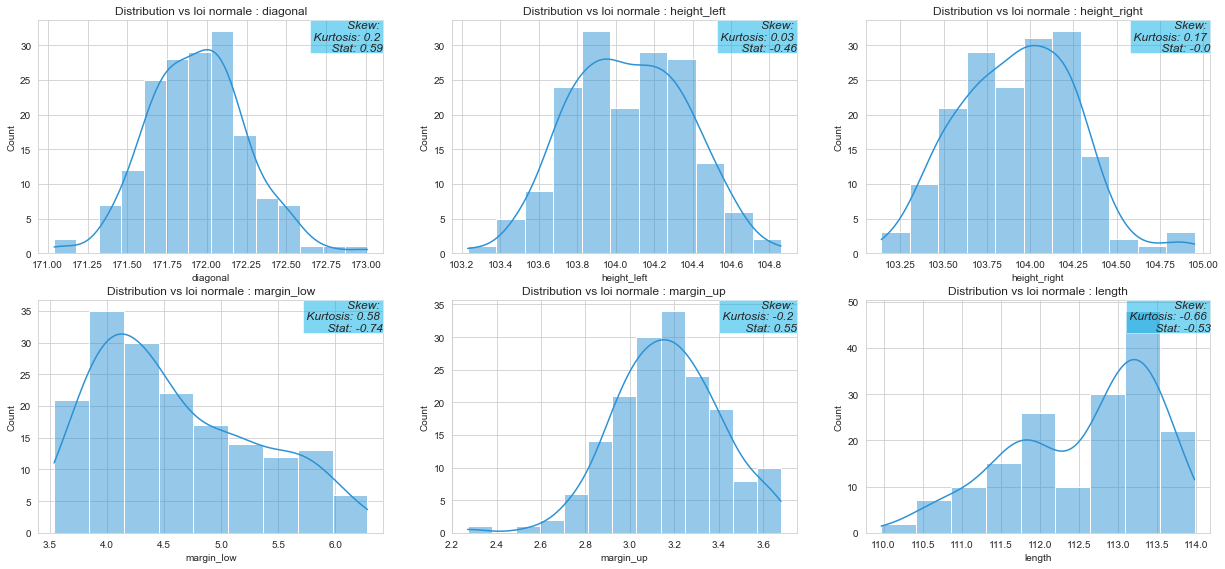

In [14]:
numerical_features= df.drop(['is_genuine'], axis = 1).columns.tolist()
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(6,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_features[i]
    kstest = stats.kstest(df[colonne].notnull(),'norm')
    #ax = sns.distplot(df[colonne], fit=stats.norm, kde=False)
    ax = sns.histplot(df[colonne], kde=True, color='#2C92D5')
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Skew: \n Kurtosis: {:.2} \n Stat: {:.2}'.format(np.round(df[colonne].skew(), 2), np.round(df[colonne].kurtosis(), 2)),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()


### Relation entre Target / Variables

In [83]:
# Création de sous - échantillons True et False
df_true = df[df['is_genuine'] == True]
df_false = df[df['is_genuine'] == False]

In [84]:
df_true.shape

(100, 7)

In [85]:
df_false.shape

(70, 7)

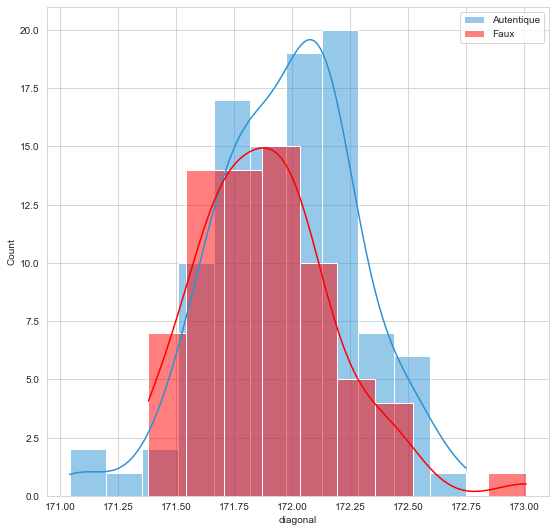

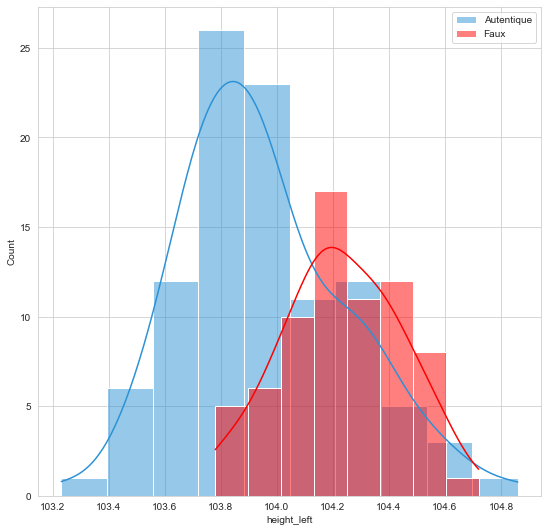

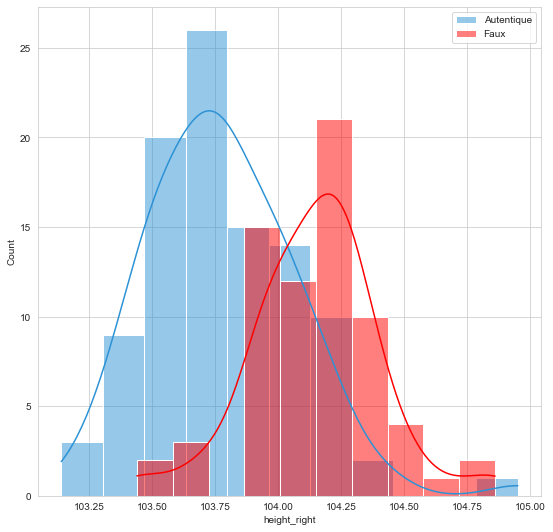

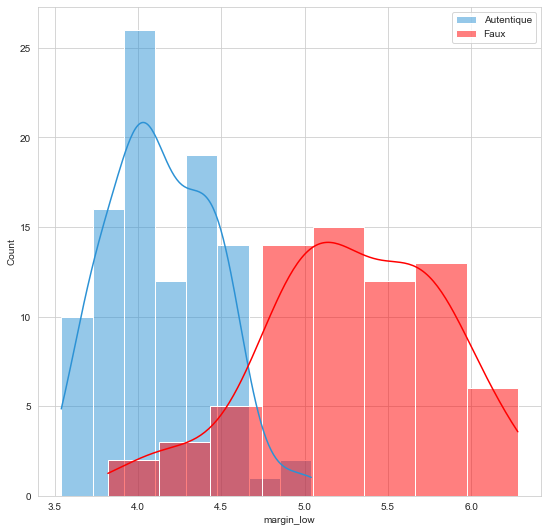

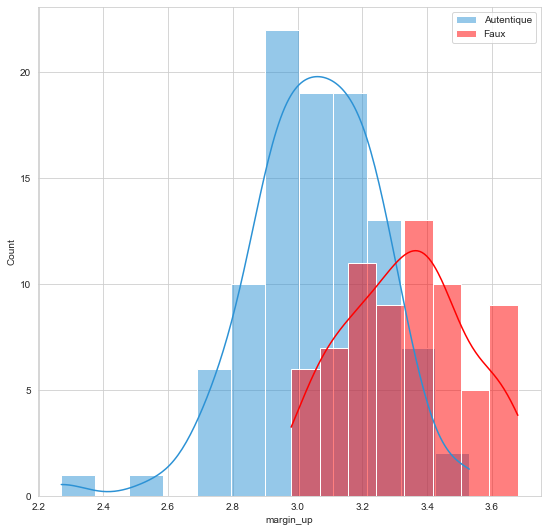

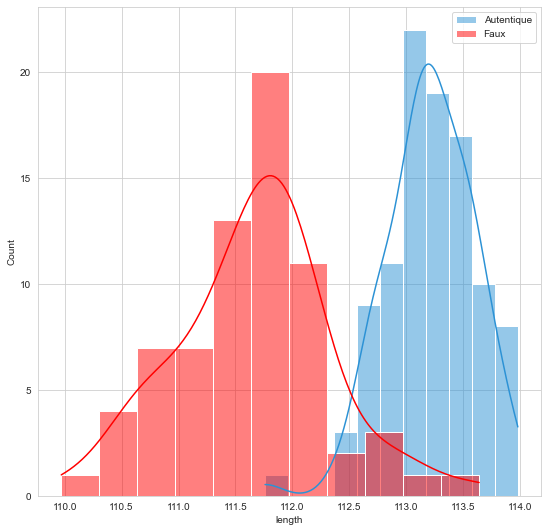

In [86]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df_true[col], kde=True, label='Autentique', color='#2C92D5')
    sns.histplot(df_false[col], kde=True, label='Faux', color='red')
    plt.legend()

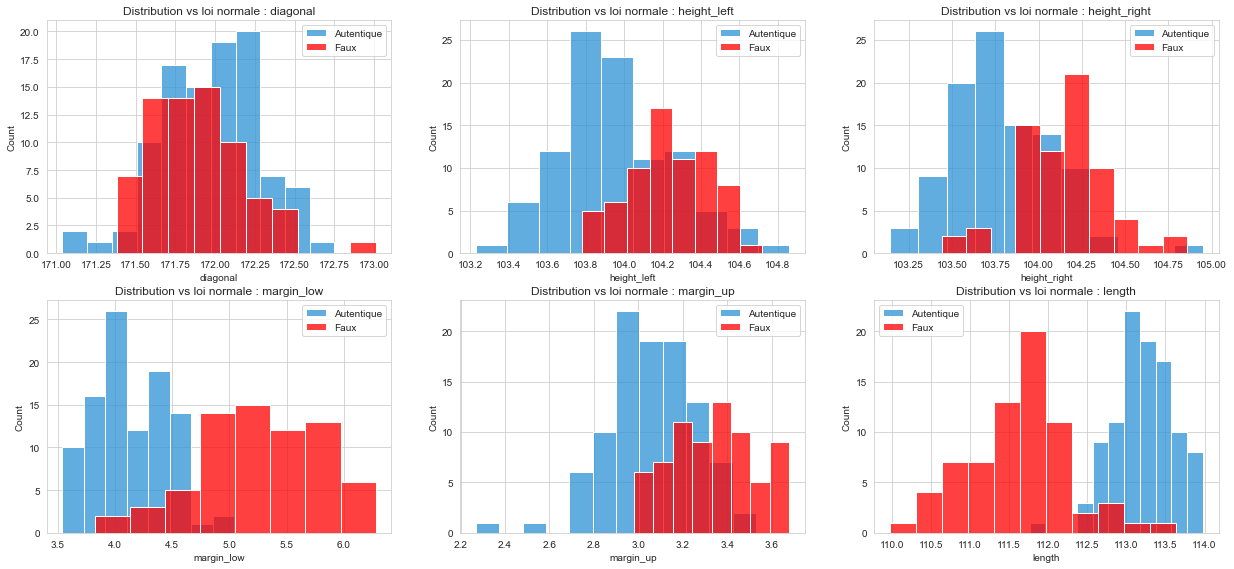

In [87]:
numerical_features= df.drop(['is_genuine'], axis = 1).columns.tolist()
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(6,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_features[i]
    kstest = stats.kstest(df[colonne].notnull(),'norm')
    #ax = sns.distplot(df[colonne], fit=stats.norm, kde=False)
    ax = sns.histplot(df_true[colonne], kde=False, label='Autentique', color='#2C92D5')
    ax1 = sns.histplot(df_false[colonne], kde=False, label='Faux', color='red')
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    sub += 1
    plt.legend()
plt.show()


## Relation variables / variables

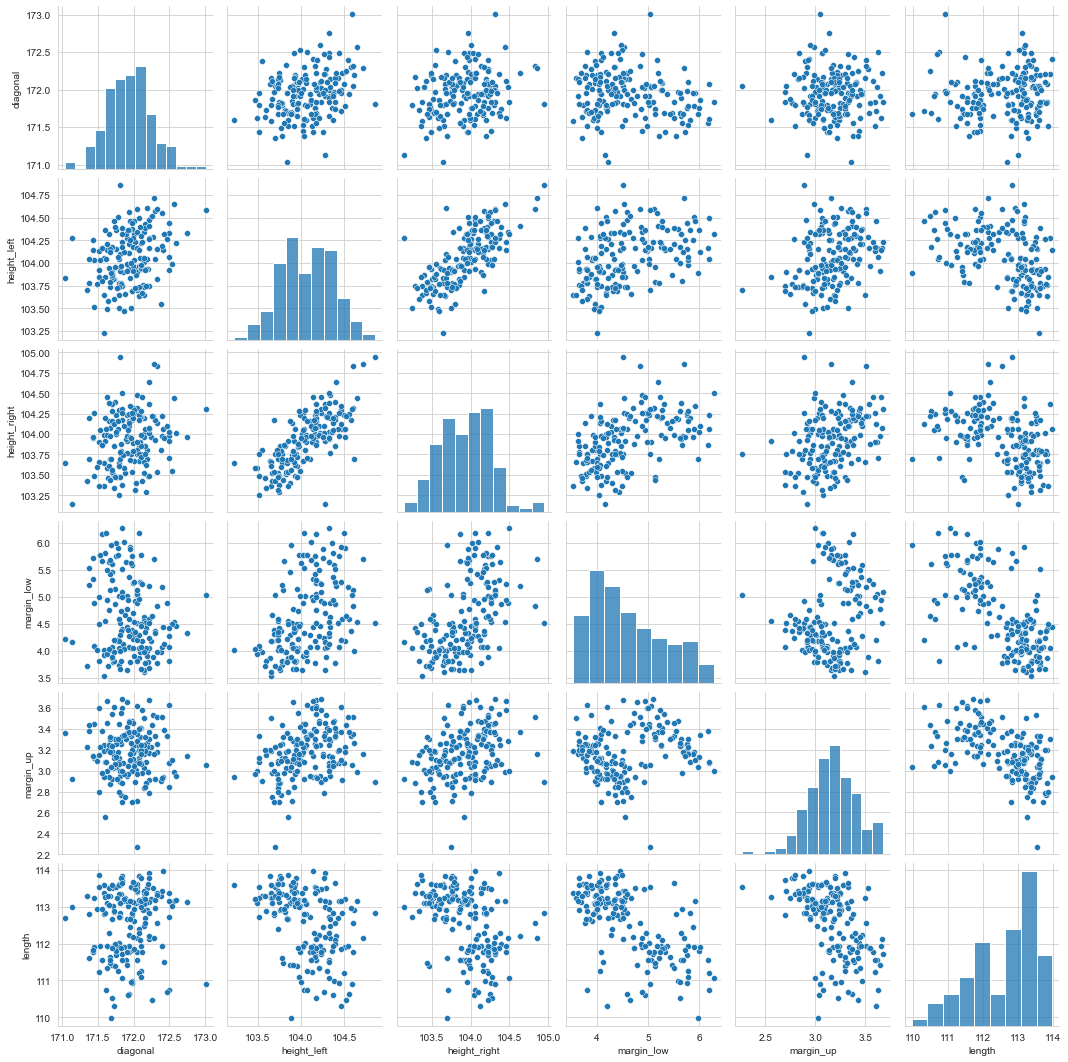

In [88]:
sns.pairplot(df.drop('is_genuine', axis = 1));

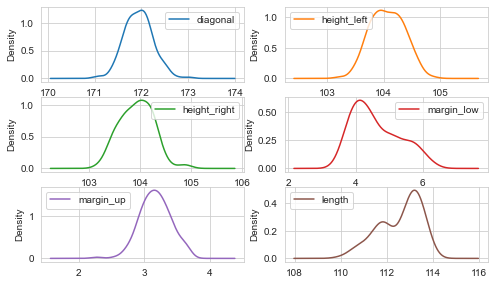

In [89]:
# Vérifions la densité des variables
df.plot(kind='density', subplots=True, layout=(5,2), sharex=False, figsize=(8,8))
plt.show()

# Test D'Agostino

In [90]:
from scipy import stats
numeric_columns = df.select_dtypes(include = ['int32','float64']).columns
#numeric_columns = numeric_columns[1:]
for column in numeric_columns:
    print('________\n{}'.format(column))
    k2, p = stats.normaltest(notes[column], 
                             axis=0,
                             nan_policy = 'omit')
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothese: x a une distribution normale
        print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))


________
diagonal
p = 0.19019
H0 ne peut être rejetée :diagonal, on considère l'hypothèse de normalité
________
height_left
p = 0.329086
H0 ne peut être rejetée :height_left, on considère l'hypothèse de normalité
________
height_right
p = 0.647519
H0 ne peut être rejetée :height_right, on considère l'hypothèse de normalité
________
margin_low
p = 0.000101906
H0 est rejetée : margin_low n'est pas de distribution normale
________
margin_up
p = 0.200356
H0 ne peut être rejetée :margin_up, on considère l'hypothèse de normalité
________
length
p = 0.000737693
H0 est rejetée : length n'est pas de distribution normale


In [91]:
from scipy import stats
x = df_true['diagonal']
y = df_false['diagonal']
stats.kruskal(x, y)


KruskalResult(statistic=5.380442522995692, pvalue=0.020363712151825045)

# Test de student

In [92]:
from scipy.stats import ttest_ind

In [93]:
def t_test(col):
    from scipy.stats import ttest_ind
    alpha = 0.05
    stat, p_val = ttest_ind(df_true.sample(df_false.shape[0])[col], df_false[col])
    if p_val < alpha:
        return 'Cette variable influe sur le statut du billet !!!'
    else:
        return 'Cette variable n\'a aucune influence sur le statut du billet !!!'
        

In [94]:
for col in df.select_dtypes('float'):
    print(f'{col :-<50} {t_test(col)}')

diagonal------------------------------------------ Cette variable n'a aucune influence sur le statut du billet !!!
height_left--------------------------------------- Cette variable influe sur le statut du billet !!!
height_right-------------------------------------- Cette variable influe sur le statut du billet !!!
margin_low---------------------------------------- Cette variable influe sur le statut du billet !!!
margin_up----------------------------------------- Cette variable influe sur le statut du billet !!!
length-------------------------------------------- Cette variable influe sur le statut du billet !!!


# Mission1

In [95]:
df.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.139223,-0.461730,-0.551309,-0.800111,-0.582801,0.825743
diagonal,0.139223,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,-0.461730,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,-0.551309,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.800111,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.582801,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.825743,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


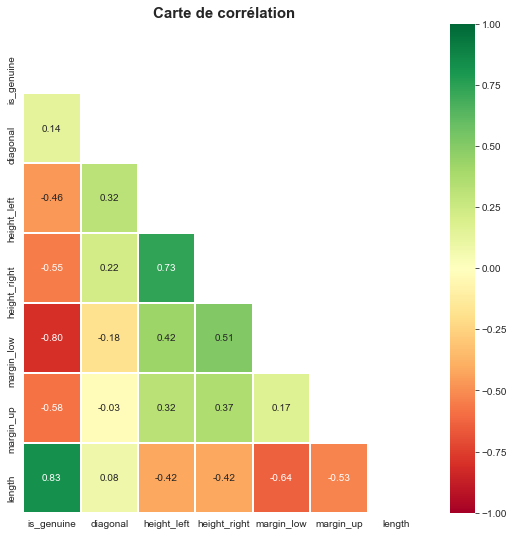

In [96]:
#Affcher la carte de corrélation avec la fonction plot_map du fichier functions
plot_heatmap(df)

In [97]:
#Préparation des données 
n_comp = 6
X = df.drop('is_genuine', axis=1).values
names = df.set_index('is_genuine').index
features = df.drop('is_genuine', axis = 1).columns

# Centrage et Réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)


### ACP

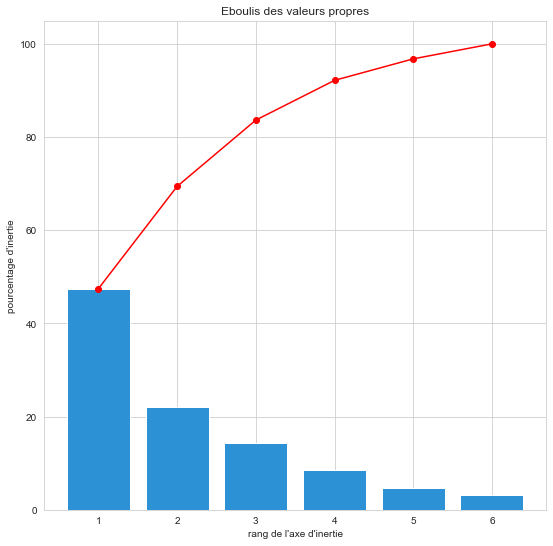

In [98]:
#ACP
pca = PCA(n_components=n_comp).fit(X_scaled)

#Les éboulis des valeurs propres
display_scree_plot(pca)

In [99]:
# cumulative explaned variance
print('\n', pca.explained_variance_ratio_)


 [0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


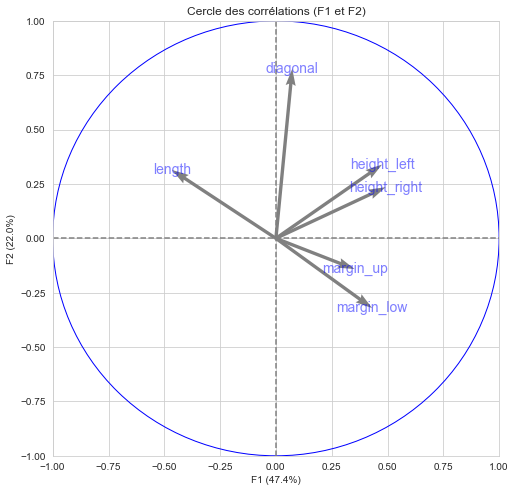

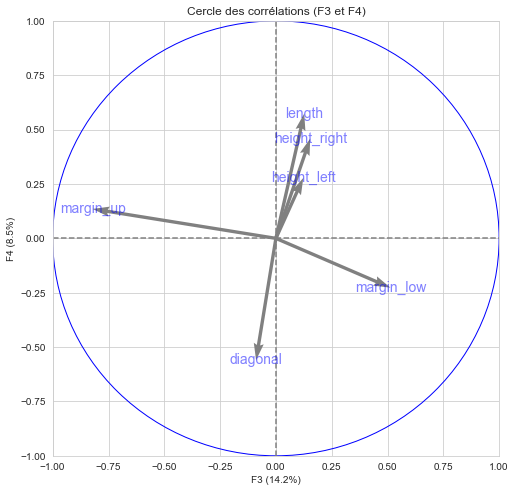

In [100]:
#Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1), (2,3)], labels = np.array(features))

In [101]:
df_pca = pd.DataFrame(pca.components_, index=['PCA'+str(i+1) for i in range(6)])


In [102]:
df_pca.columns = ['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']

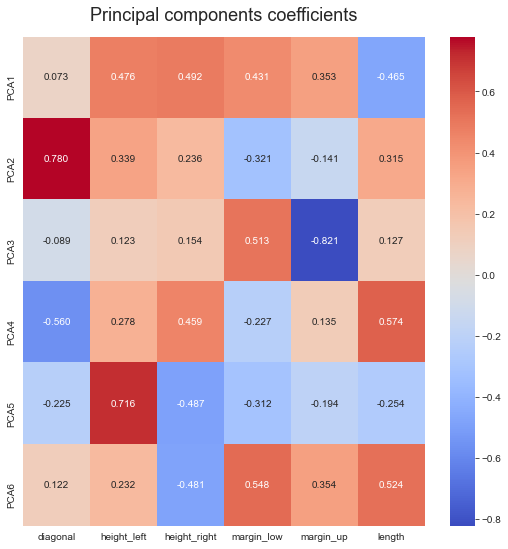

In [103]:
# Plotting principal components coefficient

heatmap=sns.heatmap(df_pca,annot=True, fmt=".3f", cmap='coolwarm')
heatmap.set_title('Principal components coefficients', fontdict={'fontsize':18}, pad=16);


In [166]:
df_pca

,diagonal,height_left,height_right,margin_low,margin_up,length
PCA1,0.073275,0.475502,0.491821,0.431027,0.352540,-0.465373
PCA2,0.779639,0.339250,0.235543,-0.320537,-0.141120,0.314536
PCA3,-0.088894,0.122760,0.153830,0.512808,-0.821149,0.126913
PCA4,-0.559732,0.278046,0.458938,-0.226528,0.135340,0.573703
PCA5,-0.225094,0.715921,-0.486993,-0.311908,-0.193943,-0.254417
PCA6,0.122166,0.232131,-0.480813,0.547630,0.354380,0.523951


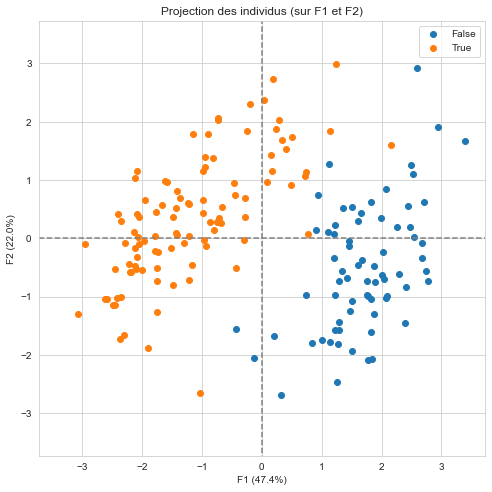

In [105]:
X_projected = pca.transform(X_scaled)

# Projection des individus
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = df.is_genuine)

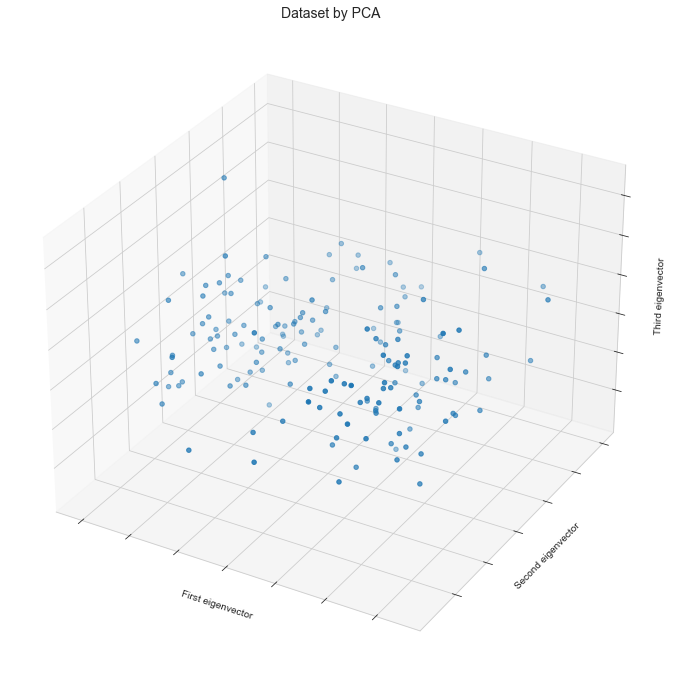

In [106]:
from mpl_toolkits.mplot3d import Axes3D

x_reduced = X_projected
fig = plt.figure()
axes = Axes3D(fig)
axes.set_title("Dataset by PCA", size=14)
axes.set_xlabel("First eigenvector")
axes.set_ylabel("Second eigenvector")
axes.set_zlabel("Third eigenvector")
axes.w_xaxis.set_ticklabels(())
axes.w_yaxis.set_ticklabels(())
axes.w_zaxis.set_ticklabels(())
axes.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2])


##  Mission 2
* Appliquez un algorithme de classification, puis analysez le résultat obtenu.
* Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.

<Figure size 720x1800 with 0 Axes>

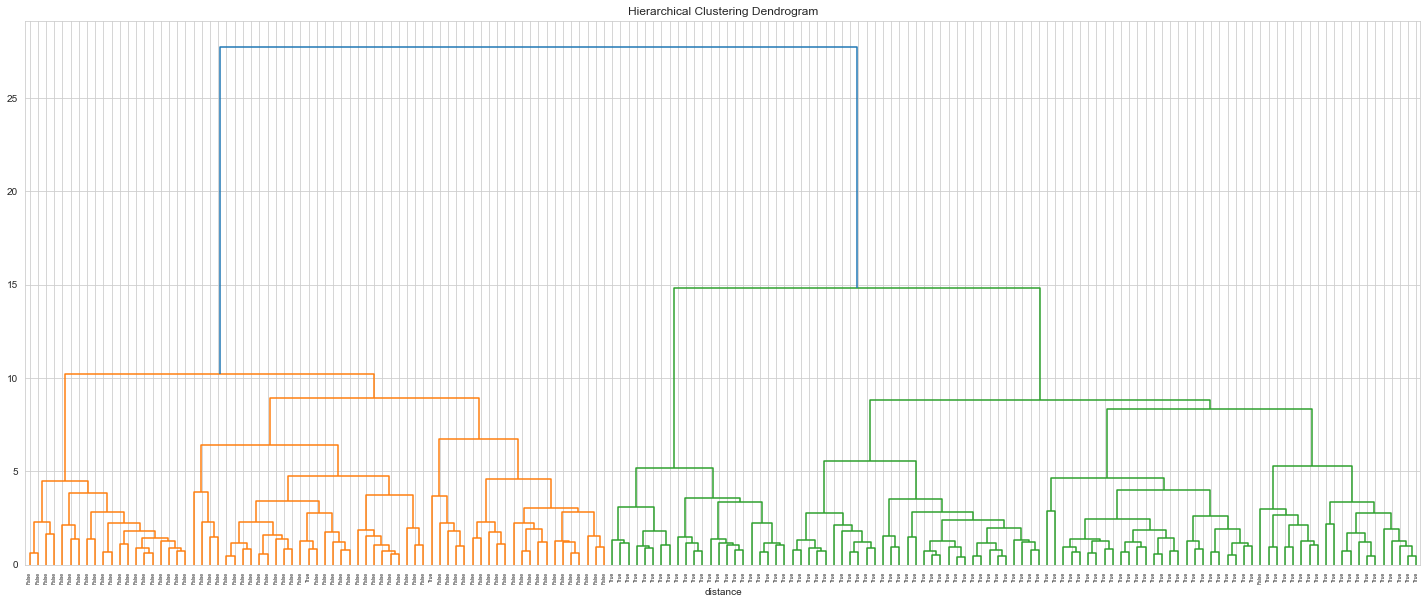

In [107]:
# Clustering hiérarchique
Z = linkage(X_projected, 'ward')

# Affichage du dendrogramme
plt.figure(figsize=(10,25))
plot_dendrogram(Z, names);
plt.show();

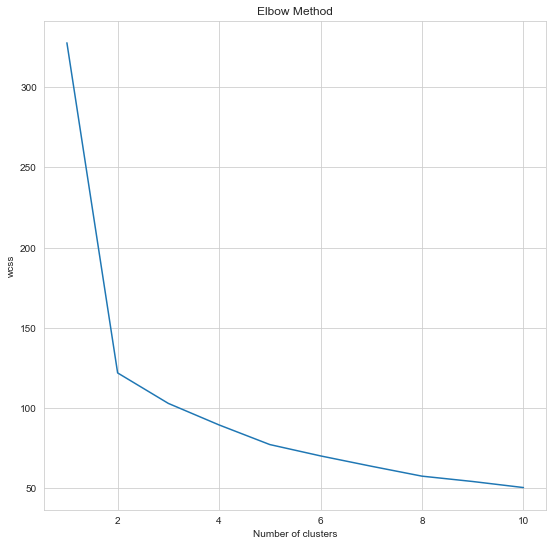

In [108]:
#Using the elbow method to find the optimum number of clusters
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [109]:
#Coupage du dendrogramme en 2 clusters
clusters = fcluster(Z, 2, criterion='maxclust')


# Comparaison des clusters trouvés avec les classification des billets 
billets = pd.DataFrame({"is_genuine": names, "cluster": clusters})

In [110]:
df['cluster']  = billets.cluster

In [111]:
pd.crosstab(df.cluster, df.is_genuine)


is_genuine,False,True
cluster,,
1,69,2
2,1,98


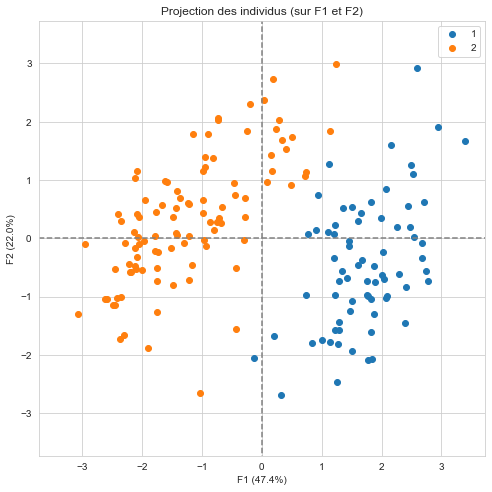

In [112]:
X_projected = pca.transform(X_scaled)

# Projection des individus
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = df.cluster)

In [113]:
del df['cluster']

# Mission 3

### Encodage

In [114]:
def encodage(df):
    code = {True :1, False :0}
    for col in df.select_dtypes('bool').columns:
        df.loc[:, col] = df[col].map(code)
    return df

In [115]:
def preprocessing(df):
    
    df = encodage(df)
    
    X = df.drop('is_genuine', axis =1)
    y = df['is_genuine']
    
    print(y.value_counts())
    
    return X, y

### TrainTest - Nettoyage - Encodage

In [116]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df, test_size=0.3, random_state=100)

In [117]:
trainset['is_genuine'].value_counts()

True     71
False    48
Name: is_genuine, dtype: int64

In [118]:
testset['is_genuine'].value_counts()

True     29
False    22
Name: is_genuine, dtype: int64

In [119]:
X_train, y_train = preprocessing(trainset)

1    71
0    48
Name: is_genuine, dtype: int64


In [120]:
X_test, y_test = preprocessing(testset)

1    29
0    22
Name: is_genuine, dtype: int64


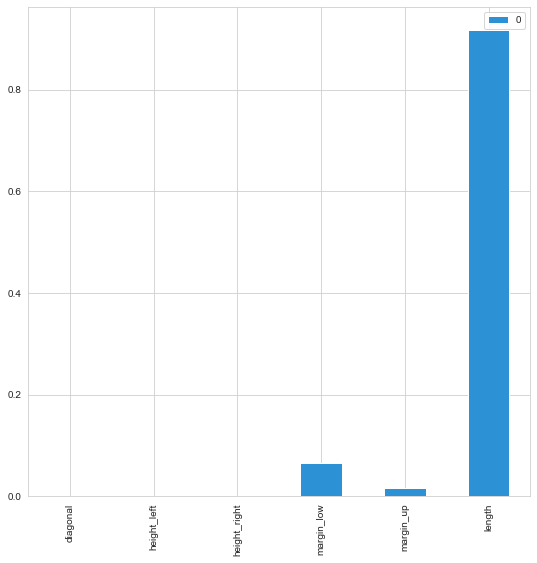

In [121]:
from sklearn.tree import DecisionTreeClassifier
#Importing Libraries
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
pd.DataFrame(model.feature_importances_, index=df.drop(['is_genuine'], axis = 1).columns).plot.bar(color='#2C92D5');


### Création du modèle

In [122]:
model = LogisticRegression(random_state=100)
model.fit(X_train, y_train)

LogisticRegression(random_state=100)

### Evaluation du modèle

In [123]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.01, 1, 20),
                                              scoring='f1', cv=10)
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis = 1), label='Train')
    plt.plot(N, val_score.mean(axis = 1), label='Validation')
    plt.legend()
    plt.show()

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.97      0.97      0.97        29

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



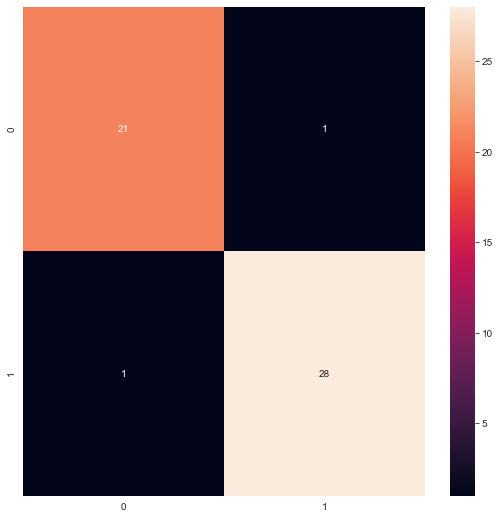

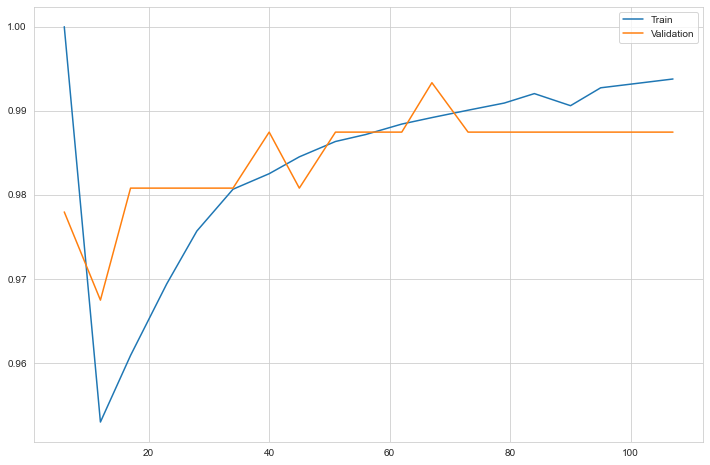

In [124]:
evaluation(model)

# Optimisation du modèle

In [151]:
# Importation de RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [152]:
# Création du preprocessor du pipeline
preprocessor = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k = 5))

In [153]:
# Choix des paramètres à soumettre à RandomizedSearchCV
params = {
    'pipeline__polynomialfeatures__degree': [2, 3, 4],
    'pipeline__polynomialfeatures__order': ['C', 'F'],
    'pipeline__polynomialfeatures__interaction_only': ['True','False'],
    'pipeline__polynomialfeatures__include_bias': ['False','True'],
    'logisticregression__solver': ["lbfgs", "sag", "saga"],
    'logisticregression__max_iter': [100, 300, 500, 1000],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'pipeline__selectkbest__k': range(40, 60)
}

In [168]:
model_optimized.best_params_

{'pipeline__selectkbest__k': 51,
 'pipeline__polynomialfeatures__order': 'F',
 'pipeline__polynomialfeatures__interaction_only': 'False',
 'pipeline__polynomialfeatures__include_bias': 'True',
 'pipeline__polynomialfeatures__degree': 4,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__penalty': 'l2',
 'logisticregression__max_iter': 100}

In [154]:
# Instanciation du pipeline
LRG = make_pipeline(preprocessor, StandardScaler(), PCA(),
                      LogisticRegression(random_state=0))

In [155]:
#Création du modèle avec RandomizedSearchCV
model_optimized = RandomizedSearchCV(LRG, params, scoring='recall', cv=4, n_iter=40)

model_optimized.fit(X_train, y_train)

y_pred = model_optimized.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.98        29

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.98        29

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



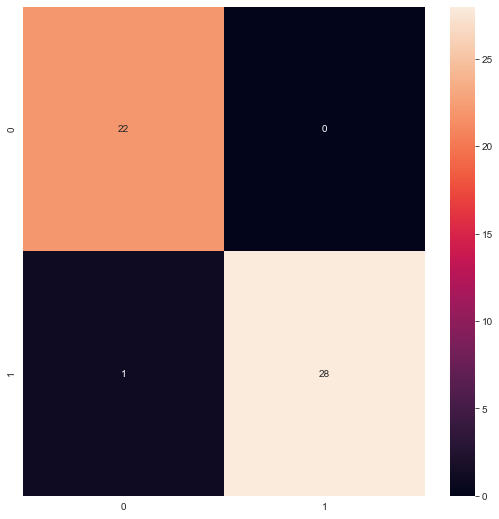

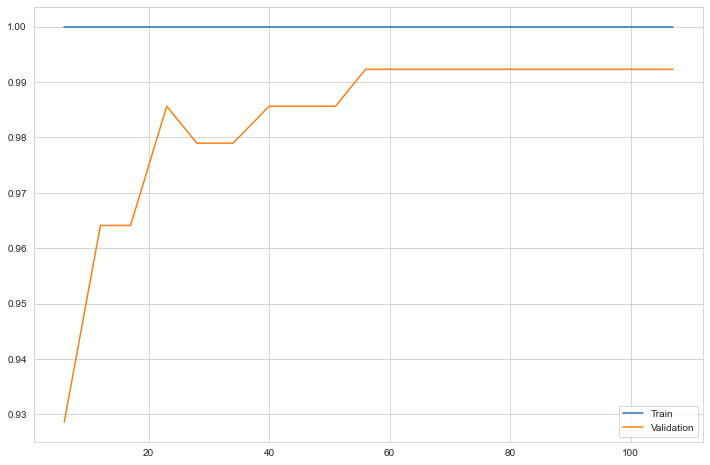

In [156]:
evaluation(model_optimized.best_estimator_)

In [157]:
print(confusion_matrix(y_test, y_pred))
print('Train set score: {:.3f}'.format(model_optimized.best_score_))

#checker la performance du modèle
y_verif= pd.DataFrame({'Statut  réel':y_test, 
                       'Statut prédit':model_optimized.predict(X_test)})
y_verif

[[22  0]
 [ 1 28]]
Train set score: 1.000


,Statut réel,Statut prédit
69,1,0
77,1,1
123,0,0
97,1,1
46,1,1
151,0,0
7,1,1
26,1,1
126,0,0
11,1,1


In [158]:
import pandas as pd
from sklearn.neighbors import KDTree
tree = KDTree(df)


In [159]:
dist, ind = tree.query(df[69:70], k=5)
df.iloc[ind.tolist()[0]]


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
69,True,171.94,104.11,104.16,4.08,3.35,111.76
80,True,172.07,103.74,103.76,4.30,3.09,112.41
78,True,172.16,104.39,103.85,3.77,3.32,112.55
9,True,172.14,104.34,104.20,4.63,3.02,112.47
32,True,172.01,104.03,103.67,3.90,3.18,112.61


In [160]:
df.loc[(df['is_genuine']  == 1) & (df['length'] < 111.77), ['is_genuine','length']]

,is_genuine,length
69,True,111.76


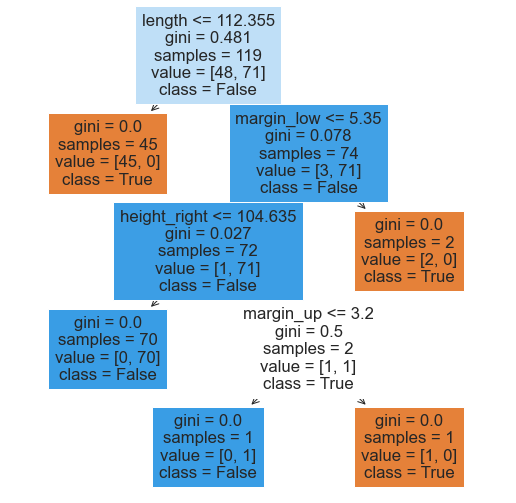

In [161]:
from sklearn import tree
#plt.rcParams['figure.figsize'] = 18, 18

best_tree = tree.DecisionTreeClassifier().fit(X_train, y_train) #models[3]["best_model"]
tree.plot_tree(best_tree, 
               feature_names=df.drop(['is_genuine'], axis = 1).columns, filled=True,class_names=['True', 'False']);

#plt.savefig('decision_tree.png', bbox_inches="tight")


# Test du modèle avec le fichier fourni

In [167]:
test = pd.DataFrame(pd.read_csv('example.csv', index_col='id'))
test

,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42
A_2,171.87,104.17,104.13,6.00,3.31,112.09
A_3,172.00,104.58,104.29,4.99,3.39,111.57
A_4,172.49,104.55,104.34,4.44,3.03,113.20
A_5,171.65,103.63,103.56,3.77,3.16,113.33


In [163]:
proba = model_optimized.best_estimator_.predict_proba(test)
pred = model_optimized.best_estimator_.predict(test)

predict =pd.DataFrame({'id': test.index,
                       'predict' : [i for i in pred],
                         'probalité' : [ i for i in proba[:,1]]
                      })
predict['statut_pred'] = predict['probalité'].apply(lambda x: 'Billet authentique' if (x >= 0.5) else 'Faux billet')
predict

,id,predict,probalité,statut_pred
0,A_1,0,0.000284,Faux billet
1,A_2,0,0.000004,Faux billet
2,A_3,0,0.000495,Faux billet
3,A_4,1,0.997441,Billet authentique
4,A_5,1,0.999886,Billet authentique
